<a href="https://colab.research.google.com/github/Gbolly-Alao1/Hamoye-repository/blob/master/Stage_E_Quiz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv('Time_series_analysis_and_forecast_DATASET.csv')

In [4]:
df.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2,2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
3,2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
4,2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [5]:
df

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.21500,3.6900,23.710
1,2010-09-01 01:00:00,15.8,1669.19500,3.6900,22.635
2,2010-09-01 02:00:00,15.8,1491.98000,3.6900,22.565
3,2010-09-01 03:00:00,15.8,1330.76000,3.6900,18.910
4,2010-09-01 04:00:00,15.8,1247.94000,3.6900,18.030
...,...,...,...,...,...
92011,2021-02-28 19:00:00,24.3,449.63625,5.4848,117.925
92012,2021-02-28 20:00:00,24.3,815.59975,5.4848,87.880
92013,2021-02-28 21:00:00,24.3,745.12325,5.4848,62.060
92014,2021-02-28 22:00:00,24.3,694.95150,5.4848,62.000


In [6]:
df["FullDate"] = pd.to_datetime(df["FullDate"]) #convert column to datetime
df.set_index("FullDate", inplace=True)

In [7]:
df

,Tmax,SysLoad,GasPrice,ElecPrice
FullDate,,,,
2010-09-01 00:00:00,15.8,1688.21500,3.6900,23.710
2010-09-01 01:00:00,15.8,1669.19500,3.6900,22.635
2010-09-01 02:00:00,15.8,1491.98000,3.6900,22.565
2010-09-01 03:00:00,15.8,1330.76000,3.6900,18.910
2010-09-01 04:00:00,15.8,1247.94000,3.6900,18.030
...,...,...,...,...
2021-02-28 19:00:00,24.3,449.63625,5.4848,117.925
2021-02-28 20:00:00,24.3,815.59975,5.4848,87.880
2021-02-28 21:00:00,24.3,745.12325,5.4848,62.060


In [8]:
#We downsample from hourly to daily data points
df_daily = df.resample('D').sum()

In [9]:
df_daily

,Tmax,SysLoad,GasPrice,ElecPrice
FullDate,,,,
2010-09-01,379.2,41565.38000,88.5600,2751.700
2010-09-02,369.6,38898.99000,88.5600,570.810
2010-09-03,439.2,41665.76000,106.8000,504.975
2010-09-04,328.8,35638.08500,81.3600,502.275
2010-09-05,357.6,35611.41000,106.8000,500.555
...,...,...,...,...
2021-02-24,537.6,-1525.49745,134.4000,634.770
2021-02-25,518.4,4539.07855,130.5048,577.515
2021-02-26,547.2,9517.02430,130.1808,1445.495


Text(0, 0.5, 'ElecPrice')

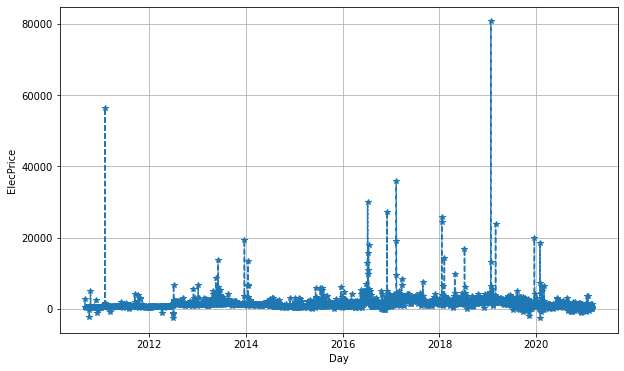

In [46]:
plt.figure(figsize=(10,6))
plt.plot(df_daily.index, df_daily.ElecPrice, '--', marker='*', )
plt.grid()
plt.xlabel('Day')
plt.ylabel('ElecPrice')

In [49]:
from statsmodels.tsa.stattools import adfuller
adf_result = adfuller(df_daily['ElecPrice'])
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')
print(f'No. of lags used: {adf_result[2]}')
print(f'No. of observations used : {adf_result[3]}')
print('Critical Values:')
for k, v in adf_result[4].items():
    print(f'   {k}: {v}') 

ADF Statistic: -8.269053866873803
p-value: 4.848817773711633e-13
No. of lags used: 20
No. of observations used : 3813
Critical Values:
   1%: -3.432066157296446
   5%: -2.8622983040036005
   10%: -2.5671736550459663


In [10]:
#Splitting the dataset into train and test sets
train_df = df_daily.iloc[0:2757]
test_df = df_daily.iloc[2757:]

In [11]:
train_df

,Tmax,SysLoad,GasPrice,ElecPrice
FullDate,,,,
2010-09-01,379.2,41565.38000,88.5600,2751.700
2010-09-02,369.6,38898.99000,88.5600,570.810
2010-09-03,439.2,41665.76000,106.8000,504.975
2010-09-04,328.8,35638.08500,81.3600,502.275
2010-09-05,357.6,35611.41000,106.8000,500.555
...,...,...,...,...
2018-03-15,609.6,27139.02585,220.6272,2717.340
2018-03-16,648.0,19710.46400,216.9600,2277.335
2018-03-17,724.8,1079.34705,209.0400,1718.385


In [12]:
test_df

,Tmax,SysLoad,GasPrice,ElecPrice
FullDate,,,,
2018-03-20,540.0,7696.91130,201.5880,1833.000
2018-03-21,571.2,4658.05865,203.2560,1730.490
2018-03-22,722.4,19161.78525,203.2560,2260.550
2018-03-23,811.2,18090.43435,198.6456,2138.760
2018-03-24,832.8,3763.53865,180.2160,1721.700
...,...,...,...,...
2021-02-24,537.6,-1525.49745,134.4000,634.770
2021-02-25,518.4,4539.07855,130.5048,577.515
2021-02-26,547.2,9517.02430,130.1808,1445.495


### **Univariate Forecasting:**



In [13]:
from fbprophet import Prophet
train_df = train_df.rename(columns={"ElecPrice": "y"})
train_df['ds'] = train_df.index

In [14]:
train_df

,Tmax,SysLoad,GasPrice,y,ds
FullDate,,,,,
2010-09-01,379.2,41565.38000,88.5600,2751.700,2010-09-01
2010-09-02,369.6,38898.99000,88.5600,570.810,2010-09-02
2010-09-03,439.2,41665.76000,106.8000,504.975,2010-09-03
2010-09-04,328.8,35638.08500,81.3600,502.275,2010-09-04
2010-09-05,357.6,35611.41000,106.8000,500.555,2010-09-05
...,...,...,...,...,...
2018-03-15,609.6,27139.02585,220.6272,2717.340,2018-03-15
2018-03-16,648.0,19710.46400,216.9600,2277.335,2018-03-16
2018-03-17,724.8,1079.34705,209.0400,1718.385,2018-03-17


In [15]:
train_df.columns.values

array(['Tmax', 'SysLoad', 'GasPrice', 'y', 'ds'], dtype=object)

In [16]:
cols = ['ds', 'y', 'Tmax', 'SysLoad', 'GasPrice']

In [17]:
#Re-arranging the columns of the dataset
train_df = train_df[cols]

In [18]:
train_df

,ds,y,Tmax,SysLoad,GasPrice
FullDate,,,,,
2010-09-01,2010-09-01,2751.700,379.2,41565.38000,88.5600
2010-09-02,2010-09-02,570.810,369.6,38898.99000,88.5600
2010-09-03,2010-09-03,504.975,439.2,41665.76000,106.8000
2010-09-04,2010-09-04,502.275,328.8,35638.08500,81.3600
2010-09-05,2010-09-05,500.555,357.6,35611.41000,106.8000
...,...,...,...,...,...
2018-03-15,2018-03-15,2717.340,609.6,27139.02585,220.6272
2018-03-16,2018-03-16,2277.335,648.0,19710.46400,216.9600
2018-03-17,2018-03-17,1718.385,724.8,1079.34705,209.0400


In [19]:
model = Prophet(daily_seasonality=True)
model.fit(train_df)

#We predict for the next 1077 days since that's the same number as samples as in the test dataset
future = model.make_future_dataframe(periods=1077, freq='D') 
forecast = model.predict(future) 
forecast.tail()
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper', 'trend', 'trend_lower', 'trend_upper']]

,ds,yhat,yhat_lower,yhat_upper,trend,trend_lower,trend_upper
0,2010-09-01,994.768446,-1396.386818,3506.175926,2370.548977,2370.548977,2370.548977
1,2010-09-02,1075.019661,-1040.880915,3413.931307,2370.499478,2370.499478,2370.499478
2,2010-09-03,849.932677,-1527.822996,3324.162824,2370.449980,2370.449980,2370.449980
3,2010-09-04,509.557419,-1744.027463,2998.551395,2370.400482,2370.400482,2370.400482
4,2010-09-05,419.532360,-1912.255486,2857.651053,2370.350984,2370.350984,2370.350984
...,...,...,...,...,...,...,...
3829,2021-02-24,3468.573371,554.483285,6272.282462,5077.814560,3528.444193,6702.724216
3830,2021-02-25,3535.428254,588.230273,6513.774981,5078.624452,3527.907167,6706.383898
3831,2021-02-26,3302.225389,457.528027,6326.220003,5079.434344,3527.777518,6710.043580
3832,2021-02-27,2958.874125,15.287478,5813.373404,5080.244236,3527.632179,6713.703262


In [41]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(test_df['ElecPrice'], forecast['yhat'].tail(1077))
round(mae, 2)

1743.85

In [50]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test_df['ElecPrice'], forecast['yhat'].tail(1077)))
round(rmse, 2)

3215.27

In [59]:
def mape(y, y_hat):
    return np.mean(np.abs((y - y_hat)/y))

In [63]:
mape(test_df['ElecPrice'], forecast['yhat'].tail(1077))

/usr/local/lib/python3.7/dist-packages/pandas/core/indexes/base.py:4024: RuntimeWarning: '<' not supported between instances of 'int' and 'Timestamp', sort order is undefined for incomparable objects
  join_index = self.union(other)


nan

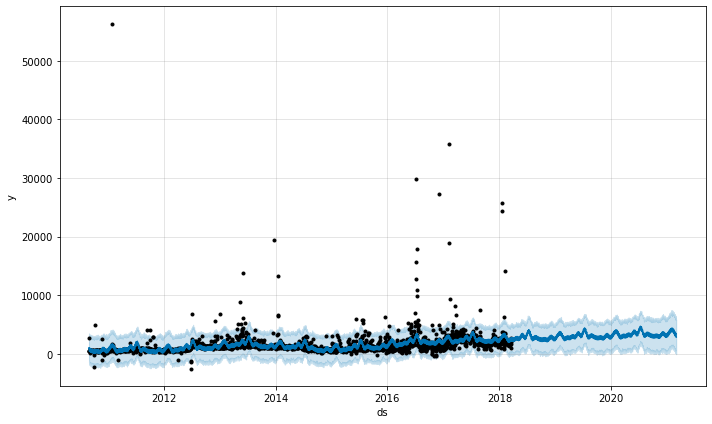

In [20]:
model.plot(forecast)
plt.show()

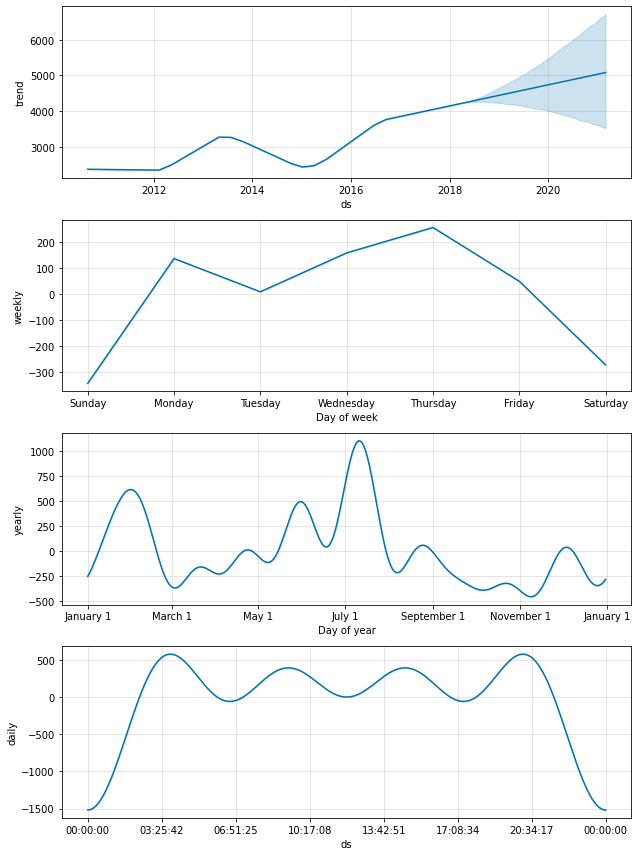

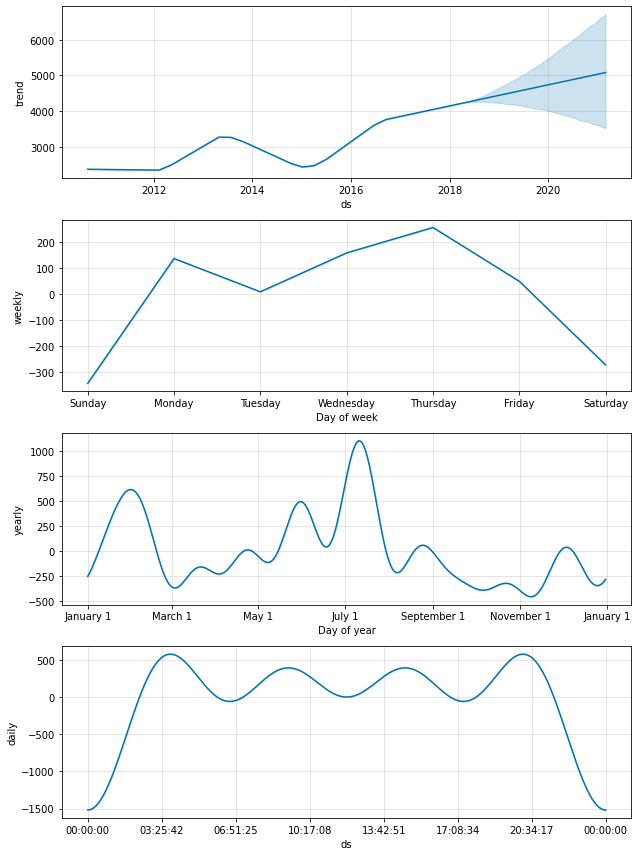

In [21]:
model.plot_components(forecast)

**Multivariate Forecasting:**

In [22]:
train_df

,ds,y,Tmax,SysLoad,GasPrice
FullDate,,,,,
2010-09-01,2010-09-01,2751.700,379.2,41565.38000,88.5600
2010-09-02,2010-09-02,570.810,369.6,38898.99000,88.5600
2010-09-03,2010-09-03,504.975,439.2,41665.76000,106.8000
2010-09-04,2010-09-04,502.275,328.8,35638.08500,81.3600
2010-09-05,2010-09-05,500.555,357.6,35611.41000,106.8000
...,...,...,...,...,...
2018-03-15,2018-03-15,2717.340,609.6,27139.02585,220.6272
2018-03-16,2018-03-16,2277.335,648.0,19710.46400,216.9600
2018-03-17,2018-03-17,1718.385,724.8,1079.34705,209.0400


In [23]:
new_model = Prophet(daily_seasonality=True)
new_model.add_regressor('Tmax')
new_model.add_regressor('SysLoad')
new_model.add_regressor('GasPrice')

In [24]:
new_model.fit(train_df)

In [25]:
new_future = new_model.make_future_dataframe(periods=1077, freq='D') 

In [26]:
new_df = train_df.copy()
new_df = new_df.append(test_df)
new_df = new_df.rename(columns={"ElecPrice": "y"})
new_df['ds'] = new_df.index
new_future = new_df[['ds', 'Tmax', 'SysLoad', 'GasPrice']]

In [27]:
new_future.head(5)

,ds,Tmax,SysLoad,GasPrice
FullDate,,,,
2010-09-01,2010-09-01,379.2,41565.380,88.56
2010-09-02,2010-09-02,369.6,38898.990,88.56
2010-09-03,2010-09-03,439.2,41665.760,106.80
2010-09-04,2010-09-04,328.8,35638.085,81.36
2010-09-05,2010-09-05,357.6,35611.410,106.80


In [28]:
new_forecast = new_model.predict(new_future) 
new_forecast.head()
new_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper', 'trend', 'trend_lower', 'trend_upper']]

,ds,yhat,yhat_lower,yhat_upper,trend,trend_lower,trend_upper
0,2010-09-01,1521.861349,-722.791092,3698.838635,2401.170703,2401.170703,2401.170703
1,2010-09-02,1473.465234,-776.508647,3665.780538,2401.661732,2401.661732,2401.661732
2,2010-09-03,1702.351332,-439.670920,4118.751113,2402.152761,2402.152761,2402.152761
3,2010-09-04,917.422590,-1168.794947,3180.126312,2402.643790,2402.643790,2402.643790
4,2010-09-05,1334.072069,-1054.791723,3482.291390,2403.134818,2403.134818,2403.134818
...,...,...,...,...,...,...,...
3829,2021-02-24,968.779356,-1312.354552,3356.493655,4015.146575,3241.430245,4798.014512
3830,2021-02-25,1327.984033,-851.602507,3735.574808,4015.840296,3241.032214,4800.417809
3831,2021-02-26,1391.422140,-941.957923,3659.780185,4016.534017,3240.634182,4802.623859
3832,2021-02-27,1046.265170,-1138.900658,3404.919492,4017.227738,3239.823162,4804.355487


In [44]:
mae = mean_absolute_error(test_df['ElecPrice'], new_forecast['yhat'].tail(1077))
round(mae, 2)

991.91

In [51]:
rmse = np.sqrt(mean_squared_error(test_df['ElecPrice'], new_forecast['yhat'].tail(1077)))
round(rmse, 2)

2709.47

In [89]:
def mape(y, y_hat):
    return np.mean(np.abs((y - y_hat)/y)*100)

In [90]:
mape(test_df['ElecPrice'], forecast['yhat'].tail(1077))

/usr/local/lib/python3.7/dist-packages/pandas/core/indexes/base.py:4024: RuntimeWarning: '<' not supported between instances of 'int' and 'Timestamp', sort order is undefined for incomparable objects
  join_index = self.union(other)


nan

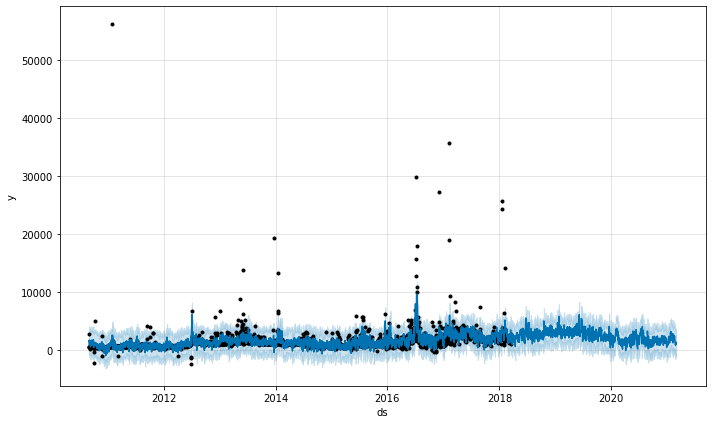

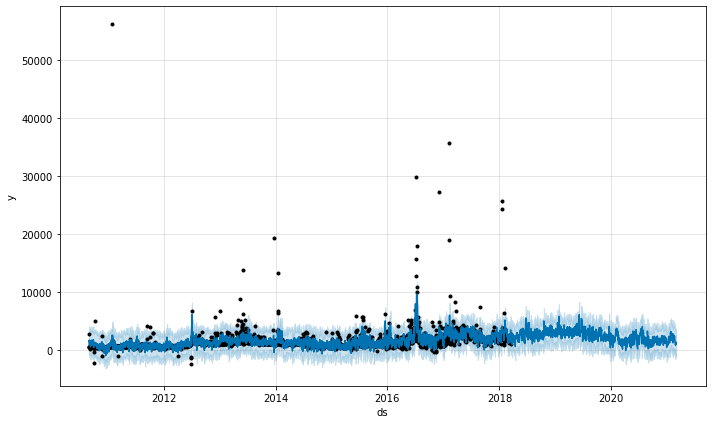

In [85]:
new_model.plot(new_forecast)

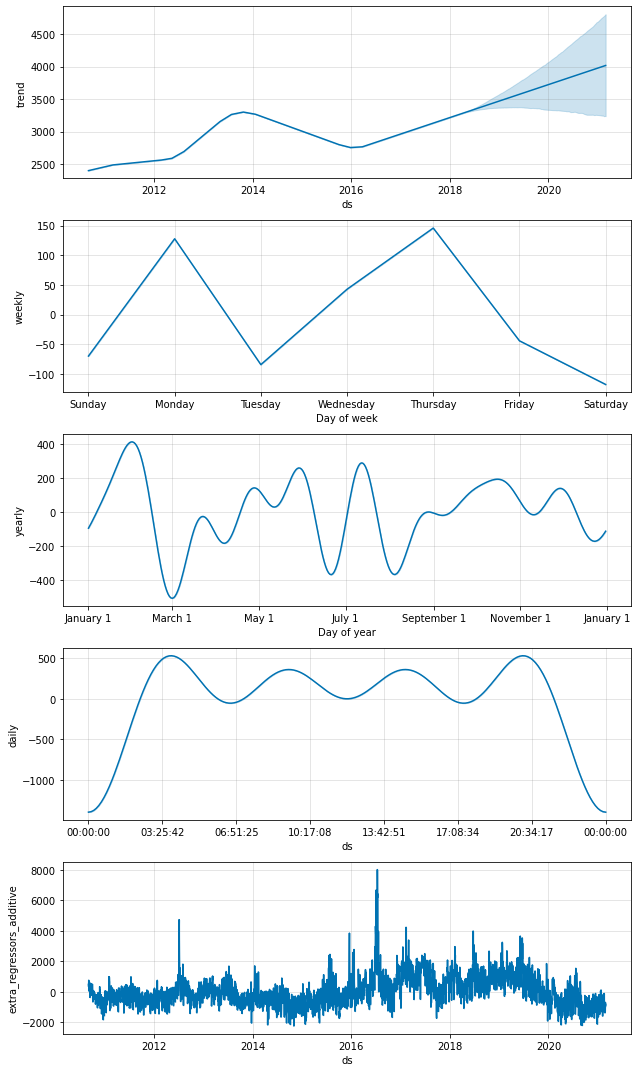

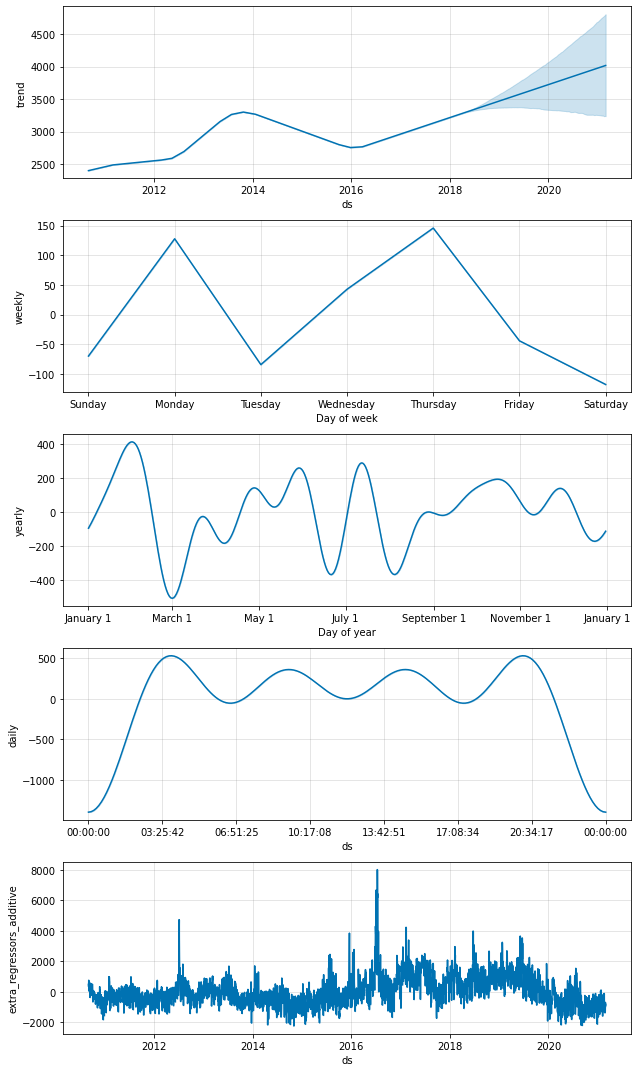

In [30]:
new_model.plot_components(new_forecast)

**For Question 20**:

In [73]:
new_train = train_df.drop(['Tmax'], axis=1)
new_test = test_df.drop(['Tmax'], axis=1)

In [65]:
n_model = Prophet(daily_seasonality=True)
n_model.add_regressor('SysLoad')
n_model.add_regressor('GasPrice')

In [68]:
n_model.fit(new_train)

In [70]:
n_future = n_model.make_future_dataframe(periods=1077, freq='D') 

In [76]:
n_df = new_train.copy()
n_df = n_df.append(new_test)
n_df = n_df.rename(columns={"ElecPrice": "y"})
n_df['ds'] = n_df.index
n_future = n_df[['ds','SysLoad', 'GasPrice']]

In [77]:
n_forecast = n_model.predict(n_future) 
n_forecast.head()
n_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper', 'trend', 'trend_lower', 'trend_upper']]

,ds,yhat,yhat_lower,yhat_upper,trend,trend_lower,trend_upper
0,2010-09-01,1509.538923,-676.439296,3651.150367,2398.328824,2398.328824,2398.328824
1,2010-09-02,1460.481044,-851.959480,3644.256761,2398.881888,2398.881888,2398.881888
2,2010-09-03,1690.368340,-554.392036,3890.872806,2399.434952,2399.434952,2399.434952
3,2010-09-04,904.784013,-1261.330193,3198.958740,2399.988015,2399.988015,2399.988015
4,2010-09-05,1322.295120,-850.540398,3666.096704,2400.541079,2400.541079,2400.541079
...,...,...,...,...,...,...,...
3829,2021-02-24,975.191083,-1468.477003,3339.796239,4035.372003,3188.629899,4833.175449
3830,2021-02-25,1334.515451,-979.299040,3669.204952,4036.072863,3188.415373,4834.820818
3831,2021-02-26,1399.108812,-961.472819,3783.454629,4036.773723,3188.198814,4836.593627
3832,2021-02-27,1053.377922,-1255.243674,3304.797557,4037.474582,3186.752427,4838.366437


In [78]:
mape(new_test['ElecPrice'], n_forecast['yhat'].tail(1077))

/usr/local/lib/python3.7/dist-packages/pandas/core/indexes/base.py:4024: RuntimeWarning: '<' not supported between instances of 'int' and 'Timestamp', sort order is undefined for incomparable objects
  join_index = self.union(other)


nan